# Capstone project for AXEL DE LA TORRE

![Course Hero](images/hero.png)

## Introduction

Describe what is your capstone project about.

## Data Set Selection

Mention the data set you selected for your capstone project, where did you find it, and why it was interesting to you

## Data Examination

Let's start with the imports for the notebook.

Note: Remember to add in the `requirements.txt` file all the modules you use.

In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


Get the selected data set into a pandas Dataframe.

Note: You need to add the right method to load the data.

In [33]:
covid_data = pd.read_csv("220815COVID19MEXICO.csv")

covid_data.head(3)

/var/folders/x6/cyq5lq_977l_ltlqy1_q283h0000gn/T/ipykernel_8183/3559488411.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data = pd.read_csv("220815COVID19MEXICO.csv")


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-08-15,z1da2d,1,12,2,1,2,2,4,2,...,99,2,97,2,97,6,99,México,97,2
1,2022-08-15,z4dc5f,1,12,19,1,19,19,26,1,...,2,2,97,2,97,6,99,México,97,97
2,2022-08-15,z23c2e,2,12,9,1,9,9,5,1,...,2,2,97,2,97,6,99,México,97,97


In [34]:
filted_covid_data = covid_data[[
    "ENTIDAD_UM",
    "CLASIFICACION_FINAL",
    "FECHA_SINTOMAS",
]]

filted_covid_data.head()

,ENTIDAD_UM,CLASIFICACION_FINAL,FECHA_SINTOMAS
0,2,6,2020-06-12
1,19,6,2020-07-13
2,9,6,2020-02-20
3,26,3,2020-12-10
4,19,3,2020-06-25


In [35]:
filted_covid_data.min()

ENTIDAD_UM                      1
CLASIFICACION_FINAL             1
FECHA_SINTOMAS         2020-01-01
dtype: object

In [36]:
filted_covid_data.max()

ENTIDAD_UM                     32
CLASIFICACION_FINAL             7
FECHA_SINTOMAS         2022-08-14
dtype: object

In [37]:
filted_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17967104 entries, 0 to 17967103
Data columns (total 3 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ENTIDAD_UM           int64 
 1   CLASIFICACION_FINAL  int64 
 2   FECHA_SINTOMAS       object
dtypes: int64(2), object(1)
memory usage: 411.2+ MB


In [38]:
#Merge State Name List to Code
mexican_states_df = pd.read_csv("mexican_states_by_code.csv")
mexican_states_df.rename(columns = {"CLAVE_ENTIDAD": "ENTIDAD_UM"}, inplace = True)
inner_merge_states = filted_covid_data.merge(mexican_states_df)
inner_merge_states.head(3)

,ENTIDAD_UM,CLASIFICACION_FINAL,FECHA_SINTOMAS,ENTIDAD_FEDERATIVA,ABREVIATURA
0,2,6,2020-06-12,BAJA CALIFORNIA,BC
1,2,6,2020-03-01,BAJA CALIFORNIA,BC
2,2,5,2020-04-22,BAJA CALIFORNIA,BC


In [39]:
#Merge State Name List to Code
clasification_status_df = pd.read_csv("clasificacion_status.csv")
clasification_status_df.rename(columns = {"CLAVE":"CLASIFICACION_FINAL"}, inplace = True)
clasification_status_df = clasification_status_df.iloc[:, 0:3]
inner_merge_confirmed_df = inner_merge_states.merge(clasification_status_df)
inner_merge_confirmed_df.head()




,ENTIDAD_UM,CLASIFICACION_FINAL,FECHA_SINTOMAS,ENTIDAD_FEDERATIVA,ABREVIATURA,CLASIFICACIÓN,DESCRIPCIÓN
0,2,6,2020-06-12,BAJA CALIFORNIA,BC,CASO SOSPECHOSO,Sospechoso aplica cuando: \nEl caso no tienen ...
1,2,6,2020-03-01,BAJA CALIFORNIA,BC,CASO SOSPECHOSO,Sospechoso aplica cuando: \nEl caso no tienen ...
2,2,6,2020-01-02,BAJA CALIFORNIA,BC,CASO SOSPECHOSO,Sospechoso aplica cuando: \nEl caso no tienen ...
3,2,6,2020-01-02,BAJA CALIFORNIA,BC,CASO SOSPECHOSO,Sospechoso aplica cuando: \nEl caso no tienen ...
4,2,6,2020-01-05,BAJA CALIFORNIA,BC,CASO SOSPECHOSO,Sospechoso aplica cuando: \nEl caso no tienen ...


In [40]:
#Merge Status Label List to CLASIFICACION FINAL
cleaned_covid_df = inner_merge_confirmed_df.loc[inner_merge_confirmed_df["CLASIFICACION_FINAL"] == 3]

In [41]:
#Change date object to datetime
cleaned_covid_df["FECHA_SINTOMAS"] =  pd.to_datetime(cleaned_covid_df["FECHA_SINTOMAS"])

cleaned_covid_df.head()

/var/folders/x6/cyq5lq_977l_ltlqy1_q283h0000gn/T/ipykernel_8183/3002315904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_covid_df["FECHA_SINTOMAS"] =  pd.to_datetime(cleaned_covid_df["FECHA_SINTOMAS"])


,ENTIDAD_UM,CLASIFICACION_FINAL,FECHA_SINTOMAS,ENTIDAD_FEDERATIVA,ABREVIATURA,CLASIFICACIÓN,DESCRIPCIÓN
11026357,2,3,2020-03-13,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026358,2,3,2020-03-17,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026359,2,3,2020-03-18,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026360,2,3,2020-03-19,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026361,2,3,2020-03-19,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...


In [42]:
#Change Colum Names
cleaned_covid_df = cleaned_covid_df.rename(columns={
    "ENTIDAD_UM": "SID",
    "CLASIFICACION_FINAL": "CID",
    "FECHA_SINTOMAS": "DATE",
    "ENTIDAD_FEDERATIVA": "STATE",
    "ABREVIATURA" : "S_ABREVIATION",
    "CLASIFICACIÓN" : "CLASIFICATION",
    "DESCRIPCIÓN" : "C_DESCRIPTION"
    })

cleaned_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6556733 entries, 11026357 to 17583089
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   SID            int64         
 1   CID            int64         
 2   DATE           datetime64[ns]
 3   STATE          object        
 4   S_ABREVIATION  object        
 5   CLASIFICATION  object        
 6   C_DESCRIPTION  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 400.2+ MB


In [43]:
cleaned_covid_df

,SID,CID,DATE,STATE,S_ABREVIATION,CLASIFICATION,C_DESCRIPTION
11026357,2,3,2020-03-13,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026358,2,3,2020-03-17,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026359,2,3,2020-03-18,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026360,2,3,2020-03-19,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
11026361,2,3,2020-03-19,BAJA CALIFORNIA,BC,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
...,...,...,...,...,...,...,...
17583085,25,3,2020-12-31,SINALOA,SL,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
17583086,25,3,2020-12-31,SINALOA,SL,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
17583087,25,3,2020-12-28,SINALOA,SL,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
17583088,25,3,2020-12-30,SINALOA,SL,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...


In [44]:
#Get Simple information to present understendable and useful data stories

#Yearly
yearly = cleaned_covid_df.groupby([cleaned_covid_df.DATE.dt.to_period('Y'),"STATE" ])[["CID"]].count().reset_index()

#Monthly
monthly = cleaned_covid_df.groupby([cleaned_covid_df.DATE.dt.to_period('M'),"STATE" ])[["CID"]].count().reset_index()

#alltime
alltime =  cleaned_covid_df.groupby([cleaned_covid_df.DATE.dt.to_period('M'),"STATE" ])[["CID"]].count().reset_index()


In [45]:
#Top 5 2020 to make Explanatory Graphics

top5_2020 = yearly[yearly["DATE"] == "2020" ].sort_values("CID", ascending=False).head(5)

top5_2020.head(5)

,DATE,STATE,CID
6,2020,CIUDAD DE MÉXICO,398436
16,2020,MÉXICO,95726
10,2020,GUANAJUATO,87474
18,2020,NUEVO LEÓN,87462
13,2020,JALISCO,56237


In [46]:
#Top 5 2021 to make Explanatory Graphics

top5_2021 = yearly[yearly["DATE"] == "2021" ].sort_values("CID", ascending=False).head(5)

top5_2021.head(5)

,DATE,STATE,CID
38,2021,CIUDAD DE MÉXICO,582276
48,2021,MÉXICO,148705
50,2021,NUEVO LEÓN,122527
42,2021,GUANAJUATO,117583
45,2021,JALISCO,109885


## Define the Hypothesis to test

Decide what is your project about.

What do you want to predict?

`Based on the data what is going to be the top 5 states of confirmed cases in Mexico for 2022?`

This information is important because it will allow National Health department to prepare in those states.

## Clean the data

Create a new Data Frame just with the data you are going to use

In [47]:
#Get Simple information to present understendable and useful data stories

#Yearly
yearly = cleaned_covid_df.groupby([cleaned_covid_df.DATE.dt.to_period('Y'),"STATE" ])[["CID"]].count().reset_index()

#Monthly
monthly = cleaned_covid_df.groupby([cleaned_covid_df.DATE.dt.to_period('M'),"STATE" ])[["CID"]].count().reset_index()

In [48]:
#Top 5 2020 to make Explanatory Graphics

top5_2020 = yearly[yearly["DATE"] == "2020" ].sort_values("CID", ascending=False).head(5)

top5_2020.head(5)

,DATE,STATE,CID
6,2020,CIUDAD DE MÉXICO,398436
16,2020,MÉXICO,95726
10,2020,GUANAJUATO,87474
18,2020,NUEVO LEÓN,87462
13,2020,JALISCO,56237


In [49]:
#Top 5 2021 to make Explanatory Graphics

top5_2021 = yearly[yearly["DATE"] == "2021" ].sort_values("CID", ascending=False).head(5)

top5_2021.head(5)

,DATE,STATE,CID
38,2021,CIUDAD DE MÉXICO,582276
48,2021,MÉXICO,148705
50,2021,NUEVO LEÓN,122527
42,2021,GUANAJUATO,117583
45,2021,JALISCO,109885


# Presentation

## Hypothesys

`Based on the hitorical data of confirmed COVID19 Cases in Mexico, what is going to be the top 5 states of confirmed cases in Mexico for 2022?`

### Why this is important?
This information is important because it will allow National Health department to prepare if needed in those states at least 3 months before the next year.

## Data Visualization

We are looking at a comparison of the two first years of COVID19: 2020 and 2021. The noticiable changes between years are:
- Guanajuato and Nuevo León Position
- Quantity of confirmed cases 

/var/folders/x6/cyq5lq_977l_ltlqy1_q283h0000gn/T/ipykernel_8183/4029821062.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x2020, rotation=45)
/var/folders/x6/cyq5lq_977l_ltlqy1_q283h0000gn/T/ipykernel_8183/4029821062.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2021, rotation=45)


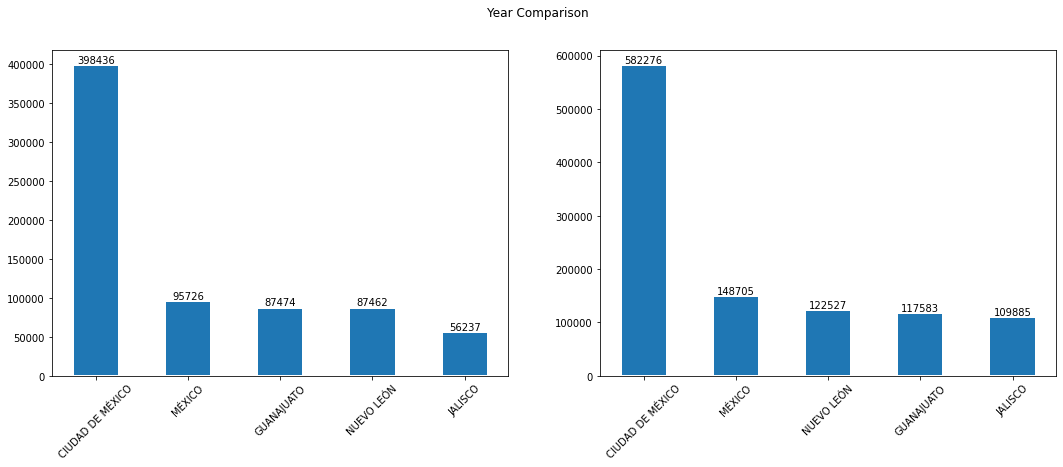

In [50]:
x2020 = top5_2020.STATE
y2020 = top5_2020.CID

x2021 = top5_2021.STATE
y2021 = top5_2021.CID


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

fig.suptitle('Year Comparison')

bar1 = ax1.bar(x2020, y2020, width=.5, edgecolor="white", linewidth=2)

bar2 = ax2.bar(x2021, y2021, width=.5, edgecolor="white", linewidth=2)

#Label values
ax1.bar_label(bar1)
ax2.bar_label(bar2)

#RotateLabels
ax1.set_xticklabels(x2020, rotation=45)
ax2.set_xticklabels(x2021, rotation=45)



plt.show()


## Run your experiment(s)

In order to run the experiment we will use the "monthly" data frame that contains Confirmed Cases Data per month and state. This will give enough data to process the historical data to predict the 2022 final Top 5 of the states with more confirmed cases in Mexico.

🥲

## Reach a conclusion

What was the result of your experiment?

How can it be improved?

Elaborate in one thing you learn during the capstone project.

## Congratulations

You have finished the bootcamp!

![Congratulations](images/congratulations.jpg)